In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from functools import partial
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

os.environ['CUDA_VISIBLE_DEVICES'] = str(1)

import sys
THRID_PARTY_LIB_PATH = (
    "../../",
)
for path in THRID_PARTY_LIB_PATH:
    path = os.path.abspath(path)
    if path not in sys.path:
        sys.path.append(path)

from utils.metrics_predefined import FactKBMetric
from utils.utils import make_df_id_column, make_df_src_column

In [3]:
test_data = pd.read_json('//data/huengchi/Datasets/MEDIQA2021/Task3/dev.json', dtype=False)
# gen_data = 
id_spec = "study_id, subject_id"
metric_src_spec = "findings, background"
metric_tgt_spec = "impression"

In [4]:
test_data = test_data.apply(partial(make_df_id_column, id_spec=id_spec),
                            axis=1)
test_data = test_data.apply(partial(make_df_src_column, src_spec=metric_src_spec),
                            axis=1)
test_data['tgt'] = test_data[metric_tgt_spec]
test_data = test_data[['id', 'src', 'tgt']]
test_data

,id,src,tgt
0,51319575_14895513,Heart size is normal. The mediastinal and hila...,No acute cardiopulmonary abnormality.
1,55445311_12837356,Semi-upright portable view of the chest demons...,"ET tube terminates 2 cm above the carina, retr..."
2,55362942_10222191,Stability of the severe bilateral pleural effu...,There is no significant change since the previ...
3,54120968_14898984,In comparison to the chest radiograph obtained...,"Unchanged, mild pulmonary edema. No radiograph..."
4,56757236_18173974,"There is no focal consolidation, pleural effus...",No evidence of acute pulmonary process. Modera...
...,...,...,...
1995,51118387_10053918,The lungs are clear without focal consolidatio...,No acute cardiopulmonary process.
1996,53706588_11209060,Frontal and lateral views of the chest were ob...,No acute cardiopulmonary process.
1997,53987789_12645334,No change in the position of the bilateral pig...,Increased opacification of the left lower lung...
1998,52230820_12632853,One portable AP upright view of the chest. Mod...,Increased right pleural effusion and mild inte...


In [5]:
factkb_scorer = FactKBMetric()

loading preloaded_factkb_model...


/data/huengchi/.bin/anaconda3/envs/torch-2.1-py-3.10/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [17]:
def compute_metric(row):
    factkb_dict = factkb_scorer(row['src'], row['tgt'])
    row['factkb'] = factkb_dict['score_details_per_sample']['factkb'][0]

    return row

In [18]:
tqdm.pandas()
test_data = test_data.progress_apply(compute_metric,
                                     axis=1)

  0%|          | 0/2000 [00:00<?, ?it/s]

AssertionError: 

<Axes: ylabel='Frequency'>

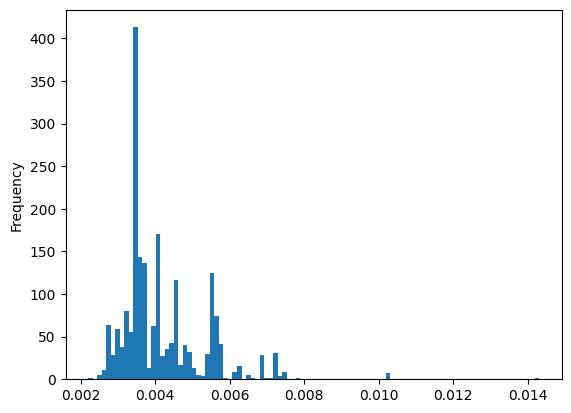

In [14]:
test_data['factkb'].plot.hist(bins=100)